In [1]:
# from graphviz import Digraph
from graphviz import Graph

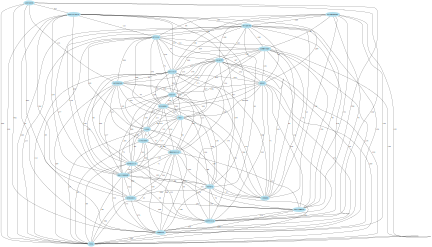

In [2]:
import json

u = Graph('cities', filename='cities.gv',
            node_attr={'color': 'lightblue2', 'style': 'filled'})
u.attr(size='6,6')

with open('UK_cities.json') as f:
    data = json.load(f)
    
# print(data)

for k0,k1 in data.items():
    for k,v in k1.items():
        u.edge(k0,k,label=str(v['weight']))   
    
u

In [3]:
import math
def is_environment_aware(environment_aware_factor,distance,speed):
    if environment_aware_factor == 0:
        cost = distance
    elif environment_aware_factor == 1:
        cost = (distance/speed)+(0.00001*speed*speed)
    elif environment_aware_factor == -1:
        speed_limit = distance
        fine_factor = 0 if speed < speed_limit else 1 - math.exp(-(speed-speed_limit))
        fine =  1000 * (fine_factor)
        car_rental = (distance/speed)*100
        cost = car_rental + fine
    else:
        cost = 0
    return cost

In [4]:
city_list = []
city_weight_map_list = []
environment_aware = 0

for k0,k1 in data.items():
    for k,v in k1.items():
        city_list.append(k0)
        city_list.append(k)
        city_weight_map_list.append([k0,k,is_environment_aware(-1,float(v['weight']),300)])

city_list = list(set(city_list))


In [5]:
# is_environment_aware(-1,float(520),300)

In [6]:
city_map_dict = {}
for i in city_list:
    alist = []
    for j in city_weight_map_list:
        if i in j:
            alist.append(j)
            city_map_dict[i] = alist

In [8]:
import node as Node

In [9]:
graph = {}
for k,v in city_map_dict.items():
    _reachable = []
    for i in v:
        _reachable.append(Node.Node(i[0] if i[0] != k else i[1], 0, i[2], None))
    graph[k] = _reachable
    

In [10]:
def get_node_cost(node):
    return node.get_cost

In [11]:
import gc

def ucf(graph,start,destination):
    
    def recursive_expand_nodes(graph,frontier,visited_nodes,destination,previous_frontier):
        if len(frontier) is not 0: # if empty return failure
#             frontier.sort(key=lambda nodes: nodes.state, reverse=False)
            node = frontier[0] # assign and pop the lowest cost node from front
#             print(str(node.get_state()),'is visited','No' if node.get_state() not in visited_nodes else 'Yes','cost to reach',str(node.get_cost()),'at depth',node.get_depth())
            
            
            frontier.remove(node)
            if node.get_state() not in visited_nodes: # if the current node is not visited then
                previous_frontier = [node.get_state()] if previous_frontier is None else visited_nodes
                print("frontier = ",[(node.get_state(),str(node.get_cost()),previous_frontier)])
                print("explored =",set(visited_nodes))
                child_node_list = graph[node.get_state()] # get all the possible path from the current node as children
                # if current_node is not equal to destination node, expand its children
                if node.get_state() not in [destination]: 
                    # parent_node_list[0].get_state()
                    # for each child in parent_node set cost, depth and add the child to frontier for it to be explored 
#                     print('Frontier selected & Child nodes of',node.get_state(),'are')
                    child_list = []
                    for child_node in child_node_list:                        
                        child_node.set_cost(node.get_cost() + child_node.get_cost())
                        child_node.set_depth(node.get_depth()+1)
#                         print("increasing depth to",child_node.get_depth(), child_node.get_state())
                        child_list.append(['depth '+str(child_node.get_depth()),child_node.get_state(),'total cost incured',child_node.get_cost()])
                        child_node.set_node(node)
                        frontier.append(child_node)
#                     print(str(child_list))

                    frontier.sort(key=lambda nodes: nodes.cost) # sort frontier according to lowest cost

                visited_nodes.append(node.get_state()) # add the current node to visited node
                #print(frontier)
                print("explored =",set(visited_nodes))
                print("destination =",destination)
                print("*"*25)
                
                # if current node is destination node then return with the path and cost
                if node.get_state() in [destination]:
                    previous_nodes = []
                    previous_nodes.append(node)
                    while node.get_node() is not None:
                        node = node.get_node()
                        previous_nodes.append(node)

                    previous_nodes = previous_nodes[::-1] # reversing the order

                    count = 0
                    print("Path =")
                    for child in previous_nodes:                        
                        if len(previous_nodes)-1 > count:
                            count = count + 1
                            print(child.get_state(),"->",previous_nodes[count].get_state(),"," ,str(previous_nodes[count].get_cost() - child.get_cost())," units")

                        # if london to london
                        if len(previous_nodes) == 1:
                            print(child.get_state(),"->",child.get_state(),",",str(previous_nodes[-1].get_cost()),"units")
                    print("Total Cost =",str(previous_nodes[-1].get_cost())," units")
                    del frontier    
                    return "Completed trace"               
            recursive_expand_nodes(graph,frontier,visited_nodes,destination,previous_frontier)
        else:
            print("Distance: Infinity")
            print("Route: None")
        
    frontier = []
    visited_nodes = []
    frontier.append(Node.Node(start))
    recursive_expand_nodes(graph,frontier,visited_nodes,destination,None)

    gc.collect()


In [12]:
ucf(graph,'london','aberdeen')


frontier =  [('london', '0.0', ['london'])]
explored = set()
explored = {'london'}
destination = aberdeen
*************************
frontier =  [('carlisle', '100.66666666666666', ['london'])]
explored = {'london'}
explored = {'london', 'carlisle'}
destination = aberdeen
*************************
frontier =  [('glasgow', '132.0', ['london', 'carlisle'])]
explored = {'london', 'carlisle'}
explored = {'london', 'carlisle', 'glasgow'}
destination = aberdeen
*************************
frontier =  [('exeter', '218.0', ['london', 'carlisle', 'glasgow'])]
explored = {'london', 'carlisle', 'glasgow'}
explored = {'london', 'carlisle', 'exeter', 'glasgow'}
destination = aberdeen
*************************
frontier =  [('brighton', '218.66666666666666', ['london', 'carlisle', 'glasgow', 'exeter'])]
explored = {'london', 'carlisle', 'exeter', 'glasgow'}
explored = {'london', 'brighton', 'exeter', 'carlisle', 'glasgow'}
destination = aberdeen
*************************
frontier =  [('dover', '225.0', 